<a href="https://colab.research.google.com/github/gobelc/orbit-plot/blob/master/Orbitas_satelite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [116]:
!pip install -q pyorbital
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
     / 189.2MB 141.2MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-eex77sbr/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pytz
from pyorbital.orbital import Orbital
from datetime import datetime
from datetime import timedelta  
from mpl_toolkits.basemap import Basemap
import geopy.distance


In [0]:
from ipywidgets import widgets  

sat_number = widgets.ToggleButtons(
    options=['noaa 15', 'noaa 18', 'noaa 19'],
    description='Satélite NOAA:',
)


duracion = widgets.IntText(
    value=960,
    description='Duración (s):',
    disabled=False
)

## Ingresar los datos del satélite

In [0]:
duracion_s = 959
satelite = 'noaa 18'
year = 2019
day = 1
month = 5
hour = 18
minute = 19
second = 18

## Cálculo de trayectoria

In [0]:
orb = Orbital(satelite)

#now = datetime.utcnow()
local_tz = pytz.timezone("America/Montevideo")
UTC_dif = 3
dtobj = datetime(year,day,month,hour+UTC_dif,minute,second)
dtobj2= dtobj + timedelta(seconds=duracion_s)  

lon, lat, alt = orb.get_lonlatalt(dtobj)
lon2, lat2, alt2 = orb.get_lonlatalt(dtobj2)


coords_1 = (lon, lat)
coords_2 = (lon2, lat2)

distancia = geopy.distance.vincenty(coords_1, coords_2).km



In [163]:
print("Posición inicio:",  orb.get_position(dtobj))
print("Longitud:", lon)
print("Latitud:", lat)
print("Altura (km):", alt)

print("\nPosición final:",  orb.get_position(dtobj2))
print("Longitud:", lon2)
print("Latitud:", lat2)
print("Altura (km):", alt2)

print("\nDistancia recorrida (km): ", distancia)

Posición inicio: (array([ 0.70632146,  0.05949065, -0.8880577 ]), array([ 0.0539186 , -0.01333665,  0.04203449]))
Longitud: -60.18933893852973
Latitud: -51.56883319222364
Altura (km): 882.1377936487769

Posición final: (array([ 1.12225807, -0.14761294,  0.07712315]), array([-0.00626918, -0.01042738,  0.06874637]))
Longitud: -76.5079419184187
Latitud: 3.920860834329003
Altura (km): 858.2692086013758

Distancia recorrida (km):  2742.0210189217264


# Visualización

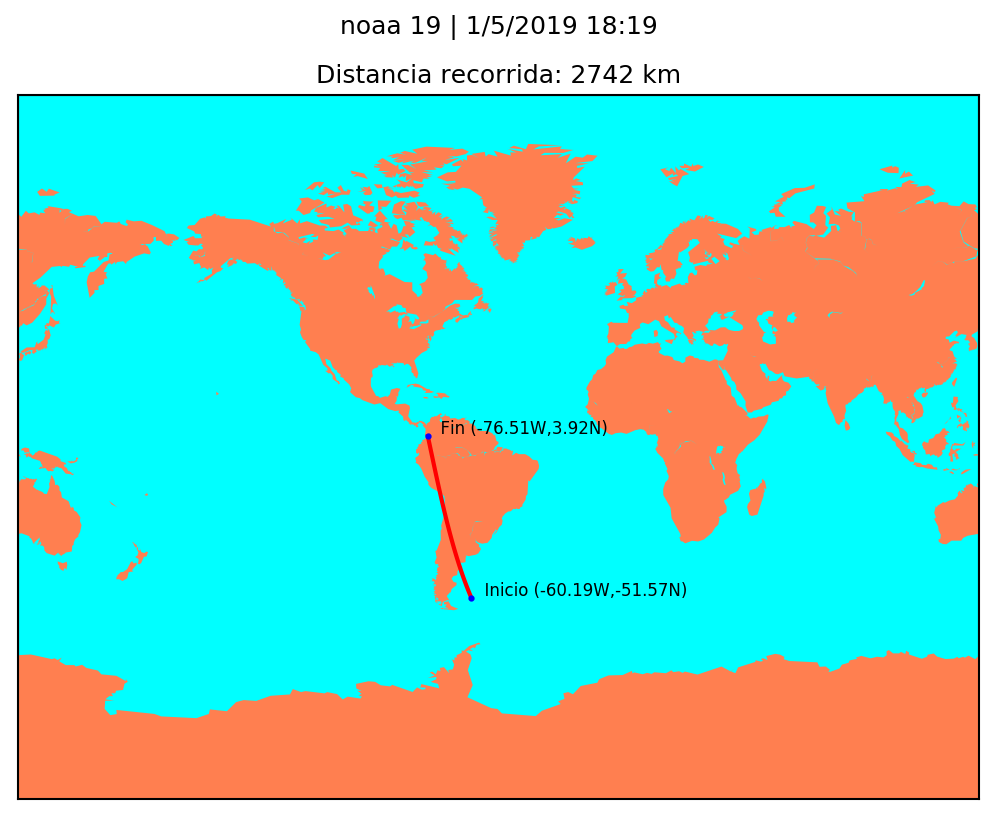

In [166]:
# create new figure, axes instances.
fig=plt.figure(figsize=(8, 6), dpi=150)
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(width=12000000,height=9000000, projection='mill',
            resolution='c',lat_1=0.,lat_2=55,lat_0=50,lon_0=-50.)
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
#m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
#m.drawmeridians(meridians,labels=[True,False,False,True])
# plot blue dot on Boulder, colorado and label it as such.
#lon, lat = -104.237, 40.125 # Location of Boulder
# convert to map projection coords.
# Note that lon,lat can be scalars, lists or numpy arrays.
xpt,ypt = m(lon,lat)
xpt2,ypt2 = m(lon2,lat2)

# convert back to lat/lon
lonpt, latpt = m(xpt,ypt,inverse=True)
lonpt2, latpt2 = m(xpt2,ypt2,inverse=True)

m.drawgreatcircle(lonpt, latpt, lonpt2, latpt2, 
                  linewidth=2, color='r', alpha=1)
m.plot(xpt,ypt,'bo', markersize=2)  # plot a blue dot there
m.plot(xpt2,ypt2,'bo', markersize=2)  # plot a blue dot there

# put some text next to the dot, offset a little bit
# (the offset is in map projection coordinates)
plt.text(xpt+100000,ypt+100000,'  Inicio (%5.2fW,%3.2fN)' % (lonpt,latpt), fontsize=8)
plt.text(xpt2+100000,ypt2+100000,'  Fin (%5.2fW,%3.2fN)' % (lonpt2,latpt2), fontsize=8)
plt.suptitle('%s | %d/%d/%d %d:%d' %(satelite,day,month,year,hour,minute))
plt.title('Distancia recorrida: %d km' %distancia)
plt.show()

